## 6.5 Unsupervised Machine Learning: Clustering

#### Contents:
1. Import Libraries
2. Import Data
3. Data Cleaning
4. The Elbow Technique
5. K-means Algorithm
6. K-means clustering analyses on Listing Features
7. Export Dataframe as pkl

#### 1. Import Libraries

In [829]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pylab as pl

#### 2. Import Data

In [830]:
path = r'/Users/rose/Documents/My Tableau Repository/Advance Analytics & Dashboard Design'

In [831]:
# Load the dataset 
df_listings_supervised_ml = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'listings_supervised_ml.pkl'))

In [832]:
df_listings_supervised_ml.head(2)

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,ward,latitude,longitude,room_type,...,distance_to_Tokyo Water Bus,distance_to_Kyu Shiba Rikyu,distance_to_Tokyo Midtown,distance_to_Roppongi,distance_to_Akasaka Sacas,distance_to_Shiodome,distance_to_Shinagawa,distance_to_Toyosu,distance_to_shinjuku_station,host_accommodates
0,197677,964081,within a day,100.0,1,1,Sumida Ku,35.71707,139.82608,Entire home/apt,...,8.922210,10.321072,12.116221,12.105863,10.979769,9.378044,13.795318,7.023003,11146.106535,2
1,776070,801494,within an hour,100.0,1,1,Kita Ku,35.73844,139.76917,Private room,...,9.159151,9.083114,9.215182,9.386202,7.914593,8.203570,12.647514,10.553556,7400.421869,1


In [833]:
df_listings_supervised_ml.shape

(12197, 80)

#### 3. Data Cleaning 

In [834]:
# Drop non-numeric columns
df_listings_numeric = df_listings_supervised_ml.select_dtypes(include=[np.number])

In [835]:
df_listings_numeric = df_listings_numeric.drop(columns=['host_is_superhost', 'host_identity_verified', 'instant_bookable'])

In [836]:
# Verify non-numeric columns are dropped
df_listings_numeric.head()

,host_response_rate,latitude,longitude,accommodates,beds,minimum_nights,number_of_reviews,review_scores_rating,price_usd,distance_to_Shinjuku Station,...,distance_to_Tokyo Water Bus,distance_to_Kyu Shiba Rikyu,distance_to_Tokyo Midtown,distance_to_Roppongi,distance_to_Akasaka Sacas,distance_to_Shiodome,distance_to_Shinagawa,distance_to_Toyosu,distance_to_shinjuku_station,host_accommodates
0,100.0,35.717070,139.826080,2,2.0,3,174,4.77,74.0,14.283174,...,8.922210,10.321072,12.116221,12.105863,10.979769,9.378044,13.795318,7.023003,11146.106535,2
1,100.0,35.738440,139.769170,1,1.0,3,249,4.98,53.0,9.360995,...,9.159151,9.083114,9.215182,9.386202,7.914593,8.203570,12.647514,10.553556,7400.421869,1
2,97.0,35.678780,139.678470,6,4.0,3,198,4.78,172.0,2.739120,...,10.893508,8.750573,5.944202,6.179871,6.487798,9.133952,8.719969,15.344277,3144.057540,6
4,100.0,35.682450,139.690090,7,5.0,1,220,4.89,166.0,1.413456,...,9.755051,7.646378,4.850616,5.116797,5.246839,7.950142,8.065074,14.155633,2098.007560,7
5,100.0,35.744731,139.797384,4,2.0,2,108,4.75,37.0,12.385435,...,10.187512,10.753512,11.568009,11.676575,10.270366,9.785463,14.438390,10.155447,9882.507453,4


#### 4. Elbow Technique

In [837]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [838]:
score = [kmeans[i].fit(df_listings_numeric).score(df_listings_numeric) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

[-197103138636.4207,
 -68285929696.84943,
 -30964668912.67237,
 -16268433477.851532,
 -10065975336.000984,
 -7249276581.865526,
 -5525798987.876651,
 -4061973983.261869,
 -3271011563.823123]

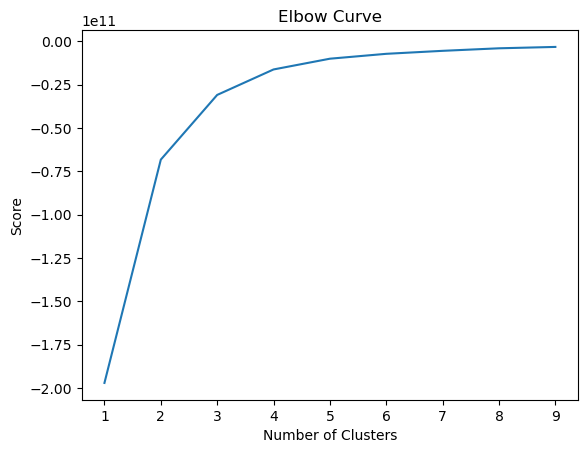

In [839]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### 5. K-Means Algorithm

In [840]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 


In [841]:
# Fit the k-means object to the data.

kmeans.fit(df_listings_numeric)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [842]:
df_listings_numeric['clusters'] = kmeans.fit_predict(df_listings_numeric)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [843]:
df_listings_numeric.head()

,host_response_rate,latitude,longitude,accommodates,beds,minimum_nights,number_of_reviews,review_scores_rating,price_usd,distance_to_Shinjuku Station,...,distance_to_Kyu Shiba Rikyu,distance_to_Tokyo Midtown,distance_to_Roppongi,distance_to_Akasaka Sacas,distance_to_Shiodome,distance_to_Shinagawa,distance_to_Toyosu,distance_to_shinjuku_station,host_accommodates,clusters
0,100.0,35.717070,139.826080,2,2.0,3,174,4.77,74.0,14.283174,...,10.321072,12.116221,12.105863,10.979769,9.378044,13.795318,7.023003,11146.106535,2,1
1,100.0,35.738440,139.769170,1,1.0,3,249,4.98,53.0,9.360995,...,9.083114,9.215182,9.386202,7.914593,8.203570,12.647514,10.553556,7400.421869,1,1
2,97.0,35.678780,139.678470,6,4.0,3,198,4.78,172.0,2.739120,...,8.750573,5.944202,6.179871,6.487798,9.133952,8.719969,15.344277,3144.057540,6,0
4,100.0,35.682450,139.690090,7,5.0,1,220,4.89,166.0,1.413456,...,7.646378,4.850616,5.116797,5.246839,7.950142,8.065074,14.155633,2098.007560,7,0
5,100.0,35.744731,139.797384,4,2.0,2,108,4.75,37.0,12.385435,...,10.753512,11.568009,11.676575,10.270366,9.785463,14.438390,10.155447,9882.507453,4,1


In [844]:
df_listings_numeric['clusters'].value_counts()

clusters
1    4308
2    3744
0    2971
3    1174
Name: count, dtype: int64

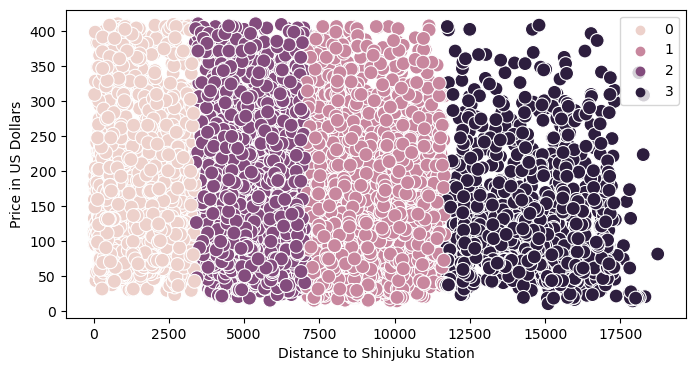

In [845]:
# Plot the clusters for the "distance_to_shinjuku_station" and "price_usd" variables.

plt.figure(figsize=(8,4))
ax = sns.scatterplot(x=df_listings_numeric['distance_to_shinjuku_station'], y=df_listings_numeric['price_usd'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Distance to Shinjuku Station') # Label x-axis.
plt.ylabel('Price in US Dollars') # Label y-axis.
plt.show()

The plot above indicates clusters of customers who look for value (lower price) over distance, with many willing to be further away from the Shinjuku Station. If not distance to a major public transportation, are they price sensitive to other attractions, or listing features?

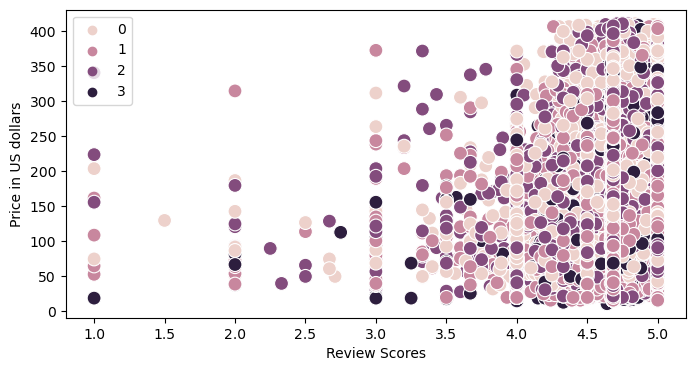

In [846]:
# Plot the clusters for the "review_scores_rating" and "price_usd" variables.

plt.figure(figsize=(8,4))
ax = sns.scatterplot(x=df_listings_numeric['review_scores_rating'], y=df_listings_numeric['price_usd'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Review Scores') 
plt.ylabel('Price in US dollars') 
plt.show()

##### For minimum nights, remove outliers:

In [847]:
def remove_outliers(df, columns):
    df_clean = df_listings_numeric.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

In [848]:
# Remove outliers
columns_to_clean = ['minimum_nights', 'price_usd']
df_clean = remove_outliers(df_listings_numeric, columns_to_clean)

In [849]:
df_clean['clusters'].value_counts()

clusters
1    4036
2    3364
0    2697
3    1094
Name: count, dtype: int64

In [850]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [851]:
score = [kmeans[i].fit(df_clean).score(df_clean) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

[-182359483694.78577,
 -63610645819.42084,
 -28356557992.565147,
 -14898667143.269855,
 -9134678484.770155,
 -6609237057.989403,
 -5086989248.0900345,
 -3712523604.5893927,
 -2983286046.7778287]

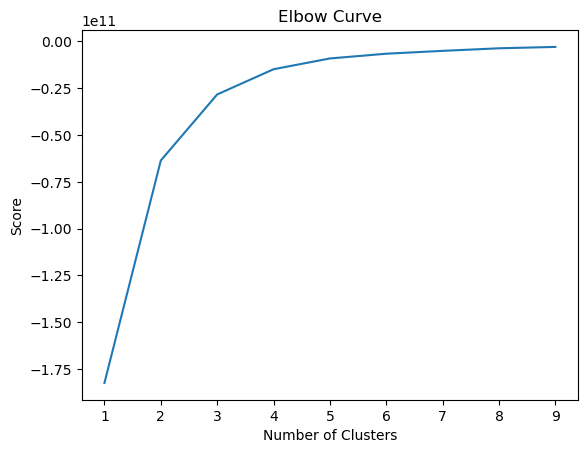

In [852]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [853]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3) 

In [854]:
# Fit the k-means object to the data.
kmeans.fit(df_clean)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [855]:
df_clean['clusters'].value_counts()

clusters
1    4036
2    3364
0    2697
3    1094
Name: count, dtype: int64

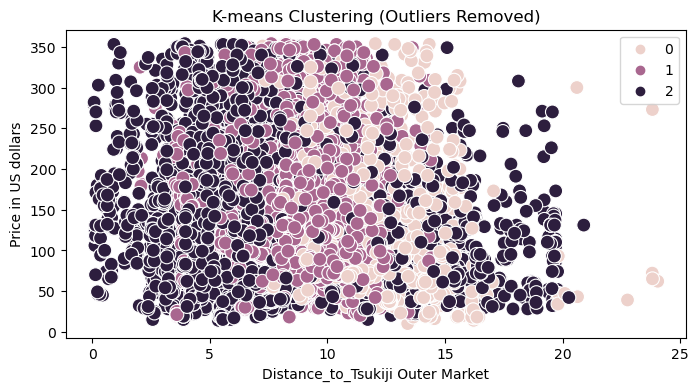

In [856]:
# Plot the clusters for the "minimum_nights" and "price_usd" variables
plt.figure(figsize=(8,4))
ax = sns.scatterplot(x=df_clean['distance_to_Tsukiji Outer Market'], y=df_clean['price_usd'], hue=kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Distance_to_Tsukiji Outer Market')
plt.ylabel('Price in US dollars')
plt.title('K-means Clustering (Outliers Removed)')
plt.show()

Visitors are willing to be further away up to a certain distance, and for the most them, they prefer low to mid price points.

In [857]:
# Performing multiple aggregations
df_listings_numeric.groupby('clusters').agg(['mean']).round(2)

,host_response_rate,latitude,longitude,accommodates,beds,minimum_nights,number_of_reviews,review_scores_rating,price_usd,distance_to_Shinjuku Station,...,distance_to_Tokyo Water Bus,distance_to_Kyu Shiba Rikyu,distance_to_Tokyo Midtown,distance_to_Roppongi,distance_to_Akasaka Sacas,distance_to_Shiodome,distance_to_Shinagawa,distance_to_Toyosu,distance_to_shinjuku_station,host_accommodates
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusters,,,,,,,,,,,,,,,,,,,,,
0,99.52,35.70,139.70,3.84,2.24,2.03,37.86,4.66,158.06,1.99,...,9.41,7.54,5.13,5.44,4.91,7.55,8.95,13.50,1467.62,3.78
1,99.28,35.71,139.78,3.86,2.43,1.85,37.55,4.69,134.48,10.98,...,8.22,8.70,9.58,9.61,8.74,8.02,11.41,8.73,8874.17,3.75
2,98.97,35.70,139.72,4.00,2.35,2.07,37.99,4.67,154.57,6.14,...,8.76,7.59,6.57,6.72,6.16,7.38,9.52,12.05,5262.11,3.92
3,99.15,35.66,139.80,4.97,2.95,2.03,29.72,4.70,131.41,16.38,...,12.30,12.88,14.03,13.91,13.88,12.76,13.28,11.90,14522.97,4.82


In [858]:
# Performing multiple aggregations
df_clean.groupby('clusters').agg(['mean']).round(2)

,host_response_rate,latitude,longitude,accommodates,beds,minimum_nights,number_of_reviews,review_scores_rating,price_usd,distance_to_Shinjuku Station,...,distance_to_Tokyo Water Bus,distance_to_Kyu Shiba Rikyu,distance_to_Tokyo Midtown,distance_to_Roppongi,distance_to_Akasaka Sacas,distance_to_Shiodome,distance_to_Shinagawa,distance_to_Toyosu,distance_to_shinjuku_station,host_accommodates
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusters,,,,,,,,,,,,,,,,,,,,,
0,99.50,35.70,139.70,3.70,2.16,1.49,38.50,4.66,149.72,1.99,...,9.39,7.53,5.13,5.43,4.90,7.54,8.95,13.48,1457.19,3.63
1,99.25,35.71,139.78,3.76,2.39,1.54,37.11,4.69,129.61,10.99,...,8.20,8.69,9.59,9.61,8.73,8.01,11.43,8.70,8871.02,3.67
2,98.95,35.70,139.72,3.88,2.29,1.52,38.65,4.67,146.77,6.19,...,8.71,7.58,6.59,6.74,6.16,7.35,9.55,11.98,5284.36,3.81
3,99.18,35.66,139.80,4.86,2.90,1.63,29.16,4.69,128.62,16.36,...,12.27,12.82,13.96,13.84,13.85,12.73,13.10,11.93,14570.36,4.71


In [859]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11191 entries, 0 to 13724
Data columns (total 70 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   host_response_rate                                  11191 non-null  float64
 1   latitude                                            11191 non-null  float64
 2   longitude                                           11191 non-null  float64
 3   accommodates                                        11191 non-null  int64  
 4   beds                                                11191 non-null  float64
 5   minimum_nights                                      11191 non-null  int64  
 6   number_of_reviews                                   11191 non-null  int64  
 7   review_scores_rating                                11191 non-null  float64
 8   price_usd                                           11191 non-null  float64
 9   

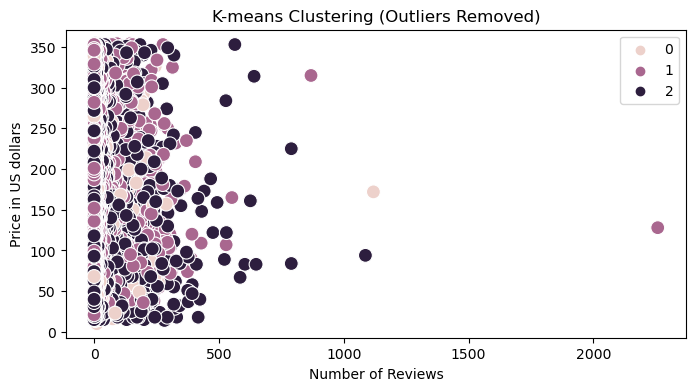

In [860]:
# Plot the clusters for the "beds" and "price_usd" variables
plt.figure(figsize=(8,4))
ax = sns.scatterplot(x=df_clean['number_of_reviews'], y=df_clean['price_usd'], hue=kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Number of Reviews')
plt.ylabel('Price in US dollars')
plt.title('K-means Clustering (Outliers Removed)')
plt.show()

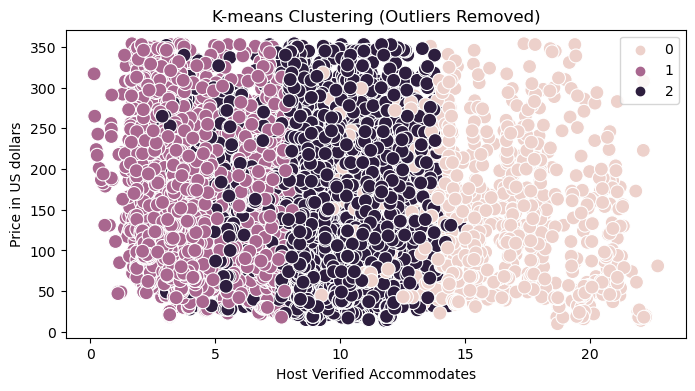

In [861]:
# Plot the clusters for the "accommodates" and "price_usd" variables
plt.figure(figsize=(8,4))
ax = sns.scatterplot(x=df_clean['distance_to_Harajuku'], y=df_clean['price_usd'], hue=kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Host Verified Accommodates')
plt.ylabel('Price in US dollars')
plt.title('K-means Clustering (Outliers Removed)')
plt.show()

#### 6. K-means clustering analyses on Listing Features

In [862]:
top_features = ['accommodates', 'beds', 'minimum_nights', 'number_of_reviews', 'review_scores_rating']

# Define the number of optimal clusters
optimal_clusters = 3

# Initialize the scaler
scaler = StandardScaler()

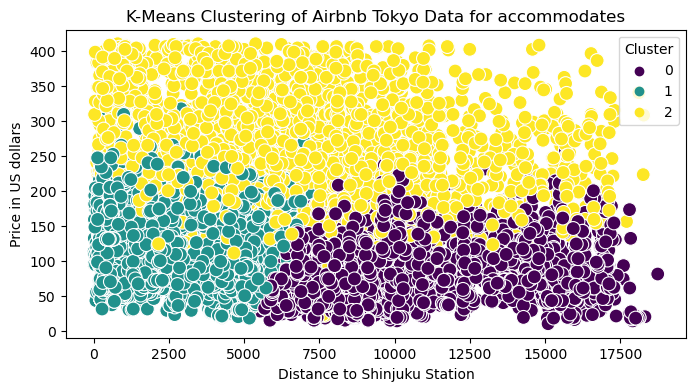

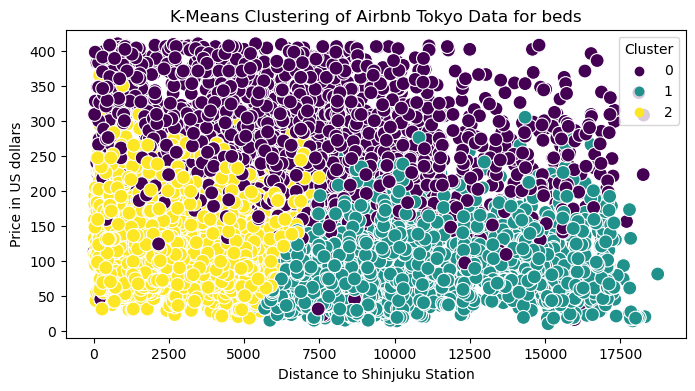

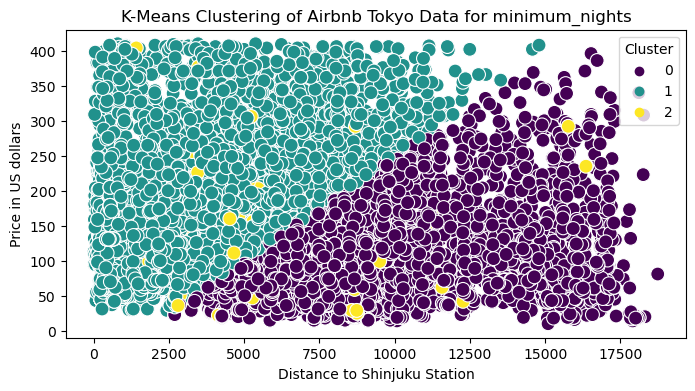

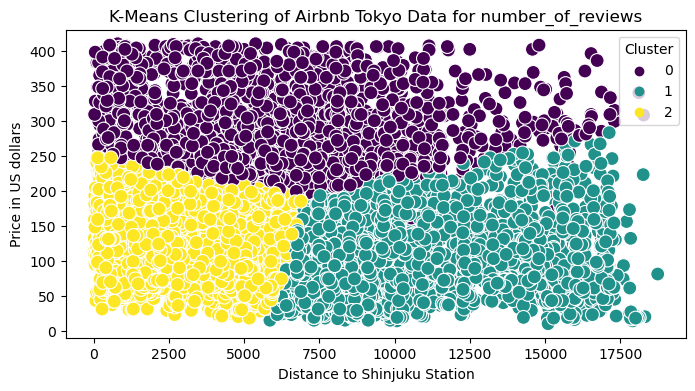

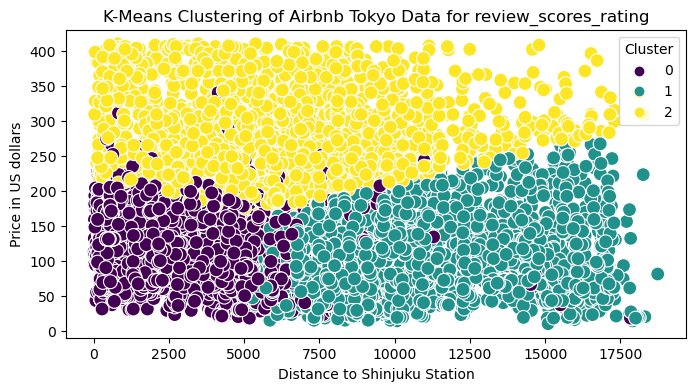

In [863]:
# Loop through each condition, running the k-means clustering analysis and creating scatterplots
for condition in top_features:
    # Filter the dataset for the specific condition
    df_features = df_listings_numeric[df_listings_numeric[condition].notnull()].copy()
    
    # Select relevant features for clustering, including the condition
    features = df_features[['distance_to_shinjuku_station', 'price_usd', condition]]
    
    # Standardize the data
    scaled_features = scaler.fit_transform(features)
             
    # Run K-Means algorithm using optimal clusters
    kmeans_condition = KMeans(n_clusters=optimal_clusters, random_state=18, n_init=10)
    df_features['Cluster'] = kmeans_condition.fit_predict(scaled_features)
        
    # Scatterplot for the specific condition
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df_features, x='distance_to_shinjuku_station', y='price_usd', hue='Cluster', palette='viridis', s=100)
    plt.title(f'K-Means Clustering of Airbnb Tokyo Data for {condition}')
    plt.xlabel('Distance to Shinjuku Station')
    plt.ylabel('Price in US dollars')
    plt.legend(title='Cluster')
    plt.show()

#### 7. Export dataframe as pkl

In [864]:
# Export df_listings_explored as “listings_visualized.pkl” under “Prepared Data” folder.
df_listings_supervised_ml.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'listings_unsupervised_ml.pkl'))

In [865]:
# Export df_listings_explored as “listings_visualized.pkl” under “Prepared Data” folder.
df_listings_numeric.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'listings_numeric_unsupervised_ml.pkl'))

## 8. Export as csv

In [866]:
# Export df_listings_explored as “listings_visualized.pkl” under “Prepared Data” folder.
df_listings_supervised_ml.to_csv(os.path.join(path, '02 Data','Prepared Data', 'listings_unsupervised_ml.csv'))

In [867]:
# Export df_listings_explored as “listings_visualized.pkl” under “Prepared Data” folder.
df_listings_numeric.to_csv(os.path.join(path, '02 Data','Prepared Data', 'listings_numeric_unsupervised_ml.csv'))